# Feature Engineering

Data does not always lead directly or easily to insights and information. Poor data cannot lead to positive outcomes. It is apparent at this point how vital data preprocessing is. Through data preparation, potentially valuable data can be extracted from raw data. 

***

**Features:** *These are special representations that are generated from the raw data through the feature engineering process.*

***

Having a solid understanding of feature engineering is essential for making effective use of machine learning tools. Since algorithms can't function with data that hasn't been properly processed and wrangled into the appropriate format, raw data is hardly used to build any Machine Learning models. Features are characteristics or attributes obtained from raw data. The three main steps needed to manage data features. The list of them is as follows:

1. Feature extraction and engineering
2. Feature scaling
3. Feature selection


![Feature Engineering Pipeline](https://drive.google.com/uc?id=129X0Ir0huQx1vP7CH9GPVSTa3cjKoAyQ)


> "Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data." - *Dr. Jason Brownlee*


### *Why Feature Engineering?*

- Better data representation
- Better performing models



## Outliers
***
**Outliers:** These are the data points that are significantly different from the remaining data.
****

***
**Multivariate Outliers:** These are a combination of unusual scores on at least two variables.
***

### *Finding Outliers?*
- Sectorial expertise
- Standard deviation approach
- z-score approach
- Bozplot Method

### *Handling Outliers?*
- Removing
- Replacing




## Missing Values
***
**Missing Values:** These refers to the absence of values for specific observations.
****

### *Missing Values?*
- Removing observations with missing data
- Performing mean or median imputation
- Replacing missing values with an arbitrary number
- Performing imputation in categorical variable breakdown
- Performing imputation with predictive value




## Encoding
***
**Encoding:** It is the process of replacing strings with numbers.
****

### Label Encoding & Binary Encoding
The binary variable indicates whether the category is present in an observation (1) or not. To collect all the data for two labels, we simply need to establish one binary variable.

### One-Hot Encoding
A group of binary variables that each represent a single category are how we represent a categorical variable. If there are k categories, we need to create k - 1  binary variables to capture all the information.

### Rare Encoding
The frequency of the variable is taken into consideration when eliminating unnecessary variables. Therefore, we can consider rare ones to be a single variable.



## Feature Extraction

### Binary Features
- New variables can be produced over the existing variables as 1 and 0. they are marked as flags.

### Text Features
- Counting characters, words, and vocabulary
- Estimating text complexity by counting sentences
- Creating features with bag-of-words and n-grams
- Implementing term frequency-inverse document frequency

### Regex Features
- We can find a string pattern and operate on the strings that match the pattern.

### Date Features
- Extracting date and time parts from a datetime variable
- Deriving representations of the year and month
- Creating representations of day and week
- Extracting time parts from a time variable
- Capturing the elapsed time between datetime variables


### Feature Interaction
- Combining multiple features with statistical operations
- Combining pairs of features with mathematical functions


## Feature Scaling
The quantity and size of the features have an impact on many machine learning techniques. We can compare feature importance when features are on a similar scale. Additionally, algorithms perform better and take less time to train when convergence occurs quickly.
- Standard Scaler
- Robust Scaler
- Min-Max Scaler


# Telco Customer Churn: Focus on *Feature Engineering*
***

**Business Problem:** The business problem is developing a machine learning model that can predict customers leaving the company. We will do the required data analysis and feature engineering procedures in this project before creating the model.

***

# Dataset
We used the **Telco Customer Churn** dataset from *Kaggle*. This dataset contains details about a hypothetical telecom provider that served 7,043 customers in California in the third quarter by offering home phone and Internet services. It displays which clients have canceled, stayed, or joined their service.

**Telco Customer Churn dataset has 21 variables (columns) and 7043 observations (rows).** Here, customers are represented by rows, while their attributes are represented by columns.


- **CustomerId:** Customer ID.

*Demographic Information:*

- **Gender:** Whether the customer is a male or a female. *(Female, Male)*
- **SeniorCitizen:** Whether the customer is a senior citizen or not. *(1, 0)*
- **Partner:** Whether the customer has a partner or not. *(1, 0)*
- **Dependents:** Whether the customer has dependents or not. *(Yes, No)*

*Customer Account Information:*

- **tenure:** Number of months the customer has stayed with the company.
- **Contract:** Customer's contract duration. *(Month-to-Month, One year, Two year)*
- **PaperlessBilling:** Whether the customer has a paperless invoice. *(Yes, No)*
- **PaymentMethod:** Customer's payment method. *(Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic))*
- **MonthlyCharges:** Amount collected from the customer on a monthly basis.
- **TotalCharges:** Total amount charged from customer.

*Services Information:*

- **PhoneService:** Whether the customer has a phone service or not. *(Yes, No)*
- **MultipleLines:** Whether the customer has multiple lines or not. *(No phone service, No, Yes)*
- **InternetService:** Customer’s internet service provider. *(DSL, Fiber optic, No)*
- **OnlineSecurity:** Whether the customer has online security or not. *(No internet service, No, Yes)*
- **OnlineBackup:** Whether the customer has an online backup.  *(No internet service, No, Yes)*
- **DeviceProtection:** Whether the customer has device protection. *(No internet service, No, Yes)*
- **TechSupport:**  Whether the customer has technical support. *(No internet service, No, Yes)*
- **StreamingTV:** Whether the customer has a TV broadcast. *(No internet service, No, Yes)*
- **StreamingMovies:** MWhether the customer has streaming movies. *(No internet service, No, Yes)*

*Target:*
- **Churn:** Customers who left within the last month. *(Yes, No)*

# Exploratory Data Analysis (EDA)

In [ ]:
# Libraries

# for data manipulation
import numpy as np
import pandas as pd

# for visualization
import seaborn as sns
from matplotlib import pyplot as plt

# for data transforming and model training
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


In [ ]:
# setting configurations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [ ]:
# dataset
df = pd.read_csv("/content/sample_data/Telco-Customer-Churn.csv")

# https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [ ]:
# the function that gives the first look
def checkDf(dataframe, head=8):
    print("##### Shape #####\n")
    print(dataframe.shape)
    print("\n##### Types #####\n")
    print(dataframe.dtypes)
    print("\n##### Tail #####\n")
    print(dataframe.tail(head))
    print("\n##### Head #####\n")
    print(dataframe.head(head))
    print("\n##### Null Analysis #####\n")
    print(dataframe.isnull().sum())
    print("\n##### Quantiles #####\n")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
# first look
checkDf(df)

##### Shape #####

(7043, 21)

##### Types #####

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

##### Tail #####

      customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService       OnlineSecurity         OnlineBackup     DeviceProtection          TechSupport          StreamingTV      StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges

In [ ]:
# check the unique values for variables
for col in df.columns:
    print('Column: {}\nUnique Values: {}\n\n'.format(col , df[col].unique()))

Column: customerID
Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


Column: gender
Unique Values: ['Female' 'Male']


Column: SeniorCitizen
Unique Values: [0 1]


Column: Partner
Unique Values: ['Yes' 'No']


Column: Dependents
Unique Values: ['No' 'Yes']


Column: tenure
Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


Column: PhoneService
Unique Values: ['No' 'Yes']


Column: MultipleLines
Unique Values: ['No phone service' 'No' 'Yes']


Column: InternetService
Unique Values: ['DSL' 'Fiber optic' 'No']


Column: OnlineSecurity
Unique Values: ['No' 'Yes' 'No internet service']


Column: OnlineBackup
Unique Values: ['Yes' 'No' 'No internet service']


Column: DeviceProtection
Unique Values: ['No' 'Yes' 'No internet service']


Column: TechSuppor

The type of data is crucial in determining the kind of visual representation, data analysis, or statistical model. What's more, the data type of a variable affects how computations for that variable will be handled by the software. This is why, we have tha following function.

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    It gives the classes of variables in the data set as categorical, numerical and categorical but cardinal.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
                   the dataframe from which the variable classes are to be imported
        cat_th: int, optional
                threshold for numeric but categorical variables
        car_th: int, optinal
                 threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                Cardinal variables with categorical appearance

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is in cat_cols.
        
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


In [ ]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [ ]:
num_cols

['tenure', 'MonthlyCharges']

In [ ]:
 cat_but_car

['customerID', 'TotalCharges']

In [ ]:
# TotalCharges should be numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

#‘coerce’, then invalid parsing will be set as NaN.

In [ ]:
df['Churn'].replace(['No', 'Yes'], [0, 1], inplace=True)

In [ ]:
checkDf(df)

##### Shape #####

(7043, 21)

##### Types #####

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

##### Tail #####

      customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService       OnlineSecurity         OnlineBackup     DeviceProtection          TechSupport          StreamingTV      StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


In [ ]:
cat_but_car

['customerID']

In [ ]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Churn']

## Categorical Variable Analysis

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)
        print( pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################\n")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.tick_params(rotation='auto')
            plt.show(block=True)
    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################\n")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.tick_params(rotation='auto')
            plt.show(block=True)


        gender  Ratio
Male      3555 50.476
Female    3488 49.524
##########################################



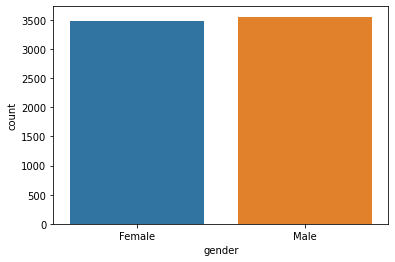

     Partner  Ratio
No      3641 51.697
Yes     3402 48.303
##########################################



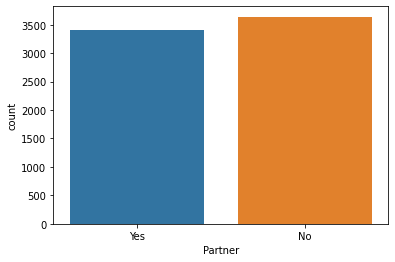

     Dependents  Ratio
No         4933 70.041
Yes        2110 29.959
##########################################



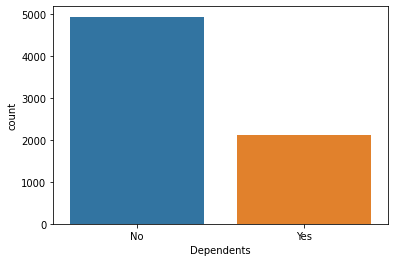

     PhoneService  Ratio
Yes          6361 90.317
No            682  9.683
##########################################



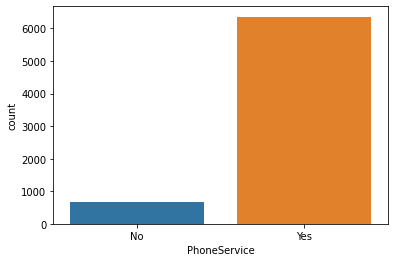

                  MultipleLines  Ratio
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################



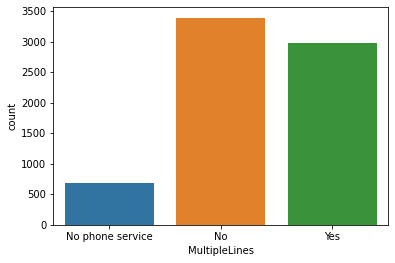

             InternetService  Ratio
Fiber optic             3096 43.959
DSL                     2421 34.375
No                      1526 21.667
##########################################



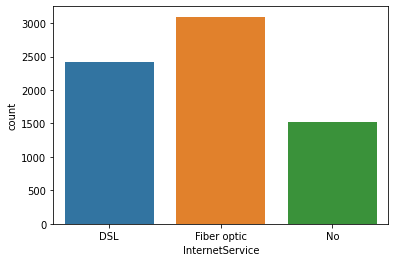

                     OnlineSecurity  Ratio
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
##########################################



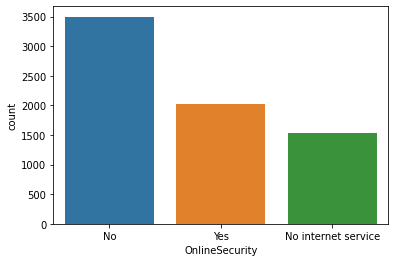

                     OnlineBackup  Ratio
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
##########################################



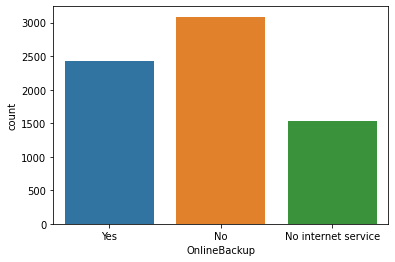

                     DeviceProtection  Ratio
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
##########################################



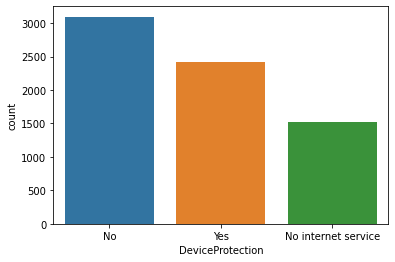

                     TechSupport  Ratio
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
##########################################



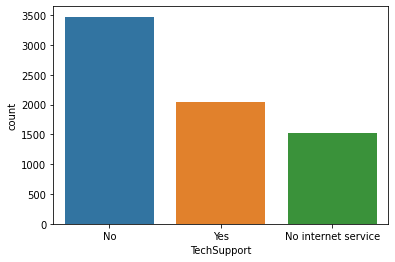

                     StreamingTV  Ratio
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
##########################################



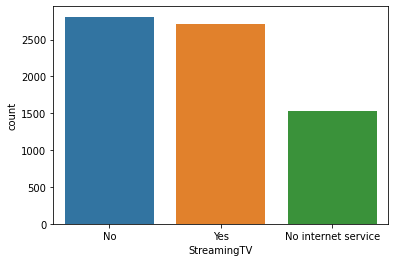

                     StreamingMovies  Ratio
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
##########################################



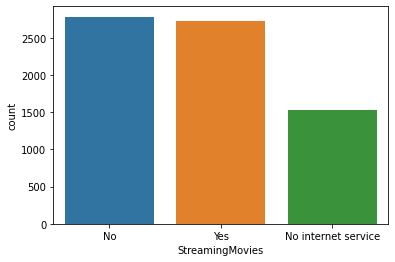

                Contract  Ratio
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##########################################



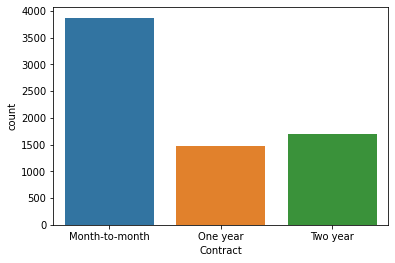

     PaperlessBilling  Ratio
Yes              4171 59.222
No               2872 40.778
##########################################



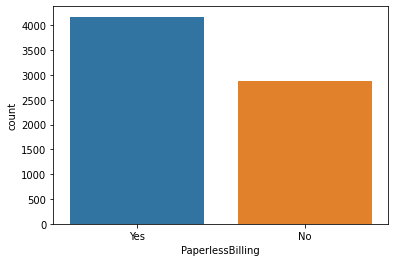

                           PaymentMethod  Ratio
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##########################################



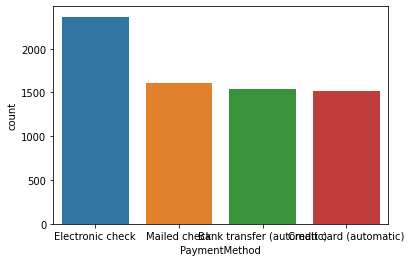

   SeniorCitizen  Ratio
0           5901 83.785
1           1142 16.215
##########################################



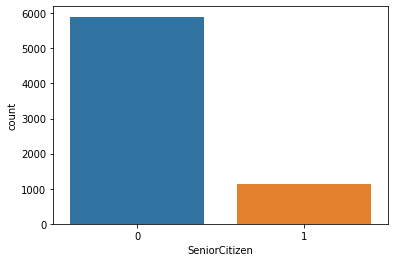

   Churn  Ratio
0   5174 73.463
1   1869 26.537
##########################################



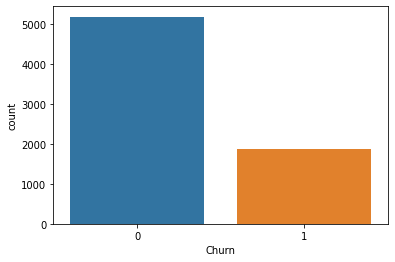

In [ ]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

## Numeric Variable Analysis

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.tick_params(rotation='auto')
        plt.show(block=True)

tenure:
count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


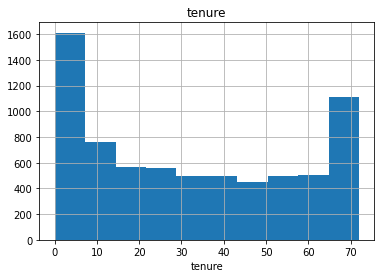

MonthlyCharges:
count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


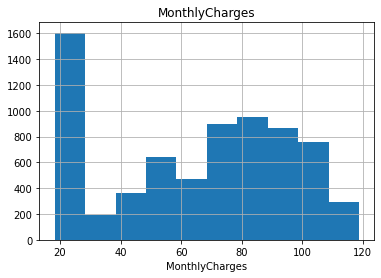

TotalCharges:
count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


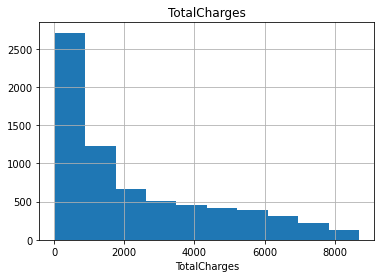

In [ ]:
for col in num_cols:
    print(f"{col}:")
    num_summary(df, col, True)

## Analysis of the Target Variable

In [ ]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
    if plot:
      prop_by_independent = pd.crosstab(df[categorical_col], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
      prop_by_independent.plot(kind='bar', stacked=True)
      plt.legend(loc="upper right", title='Churn', fancybox=True)
      plt.title('Proportion of observations by ' + categorical_col,  fontsize=16 )
      plt.tick_params(rotation='auto')
      plt.show(block=True)


        TARGET_MEAN
gender             
Female        0.269
Male          0.262




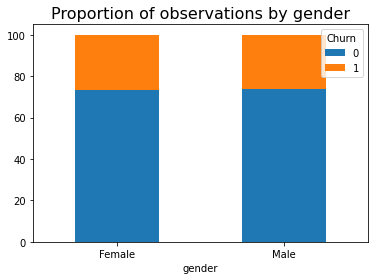

         TARGET_MEAN
Partner             
No             0.330
Yes            0.197




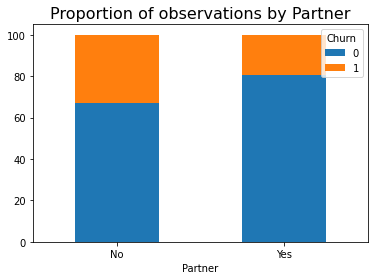

            TARGET_MEAN
Dependents             
No                0.313
Yes               0.155




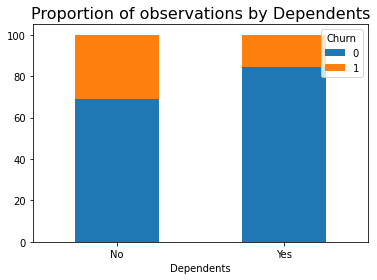

              TARGET_MEAN
PhoneService             
No                  0.249
Yes                 0.267




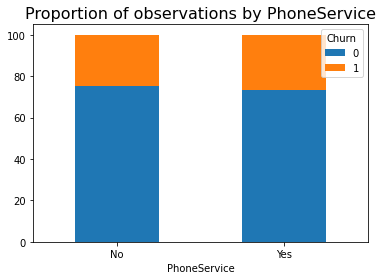

                  TARGET_MEAN
MultipleLines                
No                      0.250
No phone service        0.249
Yes                     0.286




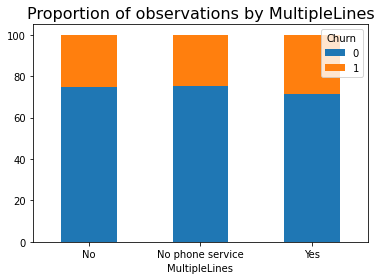

                 TARGET_MEAN
InternetService             
DSL                    0.190
Fiber optic            0.419
No                     0.074




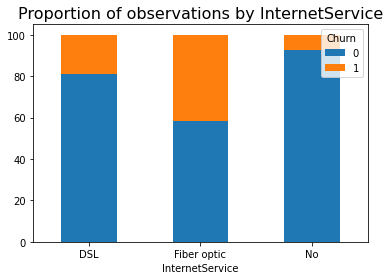

                     TARGET_MEAN
OnlineSecurity                  
No                         0.418
No internet service        0.074
Yes                        0.146




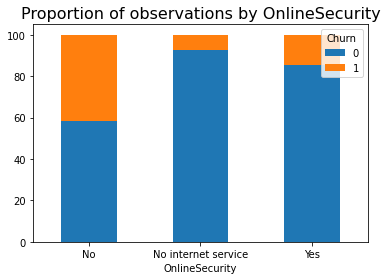

                     TARGET_MEAN
OnlineBackup                    
No                         0.399
No internet service        0.074
Yes                        0.215




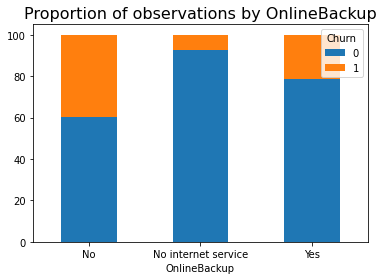

                     TARGET_MEAN
DeviceProtection                
No                         0.391
No internet service        0.074
Yes                        0.225




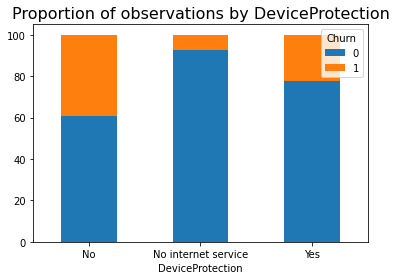

                     TARGET_MEAN
TechSupport                     
No                         0.416
No internet service        0.074
Yes                        0.152




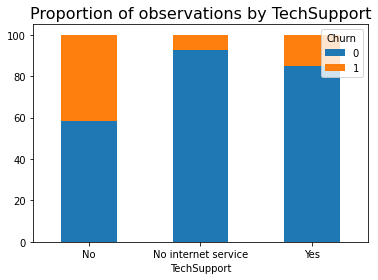

                     TARGET_MEAN
StreamingTV                     
No                         0.335
No internet service        0.074
Yes                        0.301




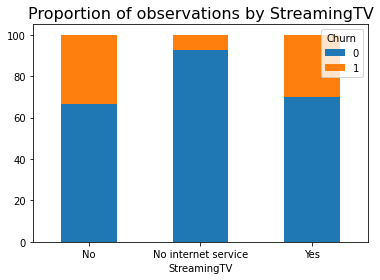

                     TARGET_MEAN
StreamingMovies                 
No                         0.337
No internet service        0.074
Yes                        0.299




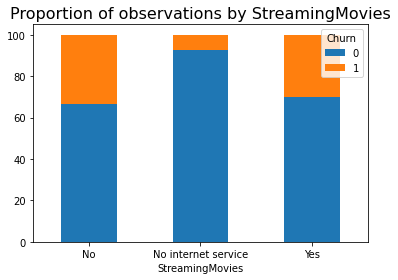

                TARGET_MEAN
Contract                   
Month-to-month        0.427
One year              0.113
Two year              0.028




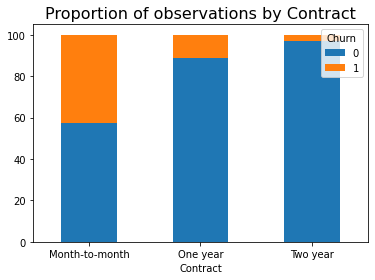

                  TARGET_MEAN
PaperlessBilling             
No                      0.163
Yes                     0.336




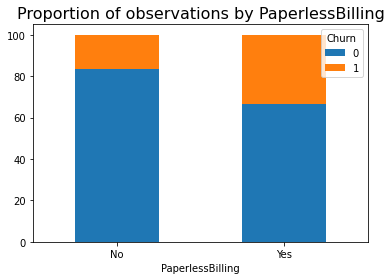

                           TARGET_MEAN
PaymentMethod                         
Bank transfer (automatic)        0.167
Credit card (automatic)          0.152
Electronic check                 0.453
Mailed check                     0.191




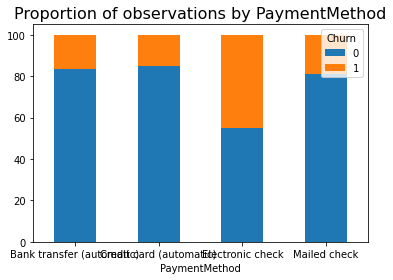

               TARGET_MEAN
SeniorCitizen             
0                    0.236
1                    0.417




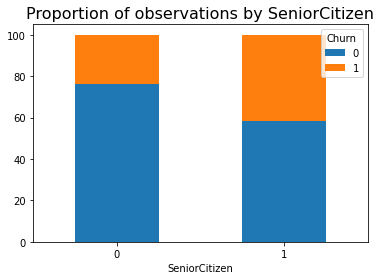

       TARGET_MEAN
Churn             
0            0.000
1            1.000




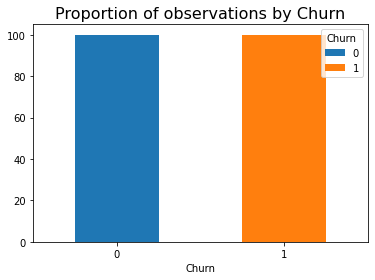

In [ ]:
for col in cat_cols:
    target_summary_with_cat(df, "Churn", col, plot=True)

In [ ]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


In [ ]:
for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
0      37.570
1      17.979


       MonthlyCharges
Churn                
0              61.265
1              74.441


       TotalCharges
Churn              
0          2555.344
1          1531.796




## Corelation Analysis

In [ ]:
corr_matrix = df[num_cols].corr()
corr_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.000,0.248,0.826
MonthlyCharges,0.248,1.000,0.651
TotalCharges,0.826,0.651,1.000


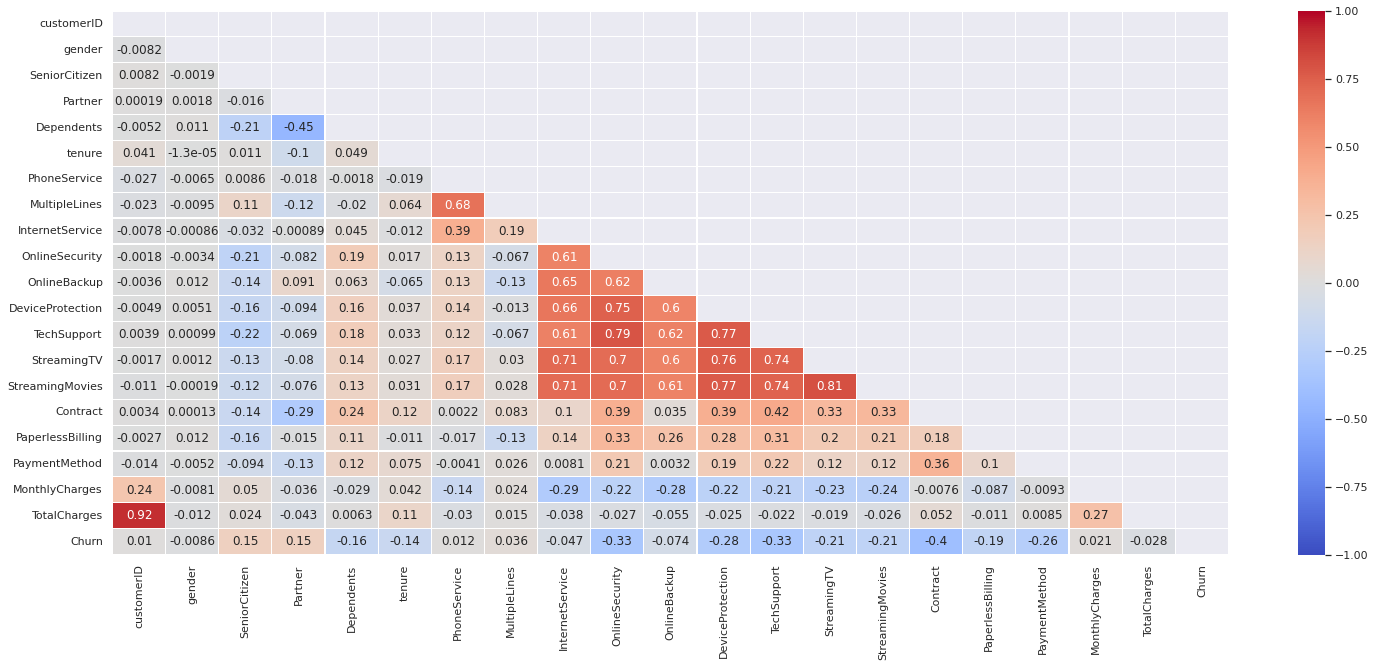

In [ ]:
# Correlation between all variables
plt.figure(5, figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# Feature Engineering

## Outliers

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

##########################################
Outlier tresholds for  tenure  is  (-60.0, 124.0)
There is no outlier data in tenure 



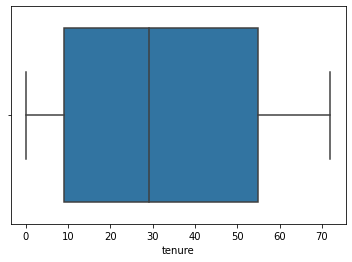

##########################################
Outlier tresholds for  MonthlyCharges  is  (-46.02499999999999, 171.375)
There is no outlier data in MonthlyCharges 



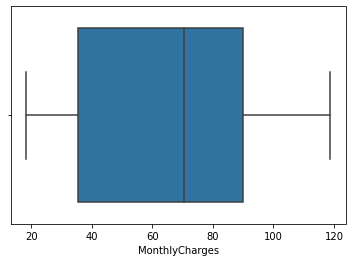

##########################################
Outlier tresholds for  TotalCharges  is  (-4688.481250000001, 8884.66875)
There is no outlier data in TotalCharges 



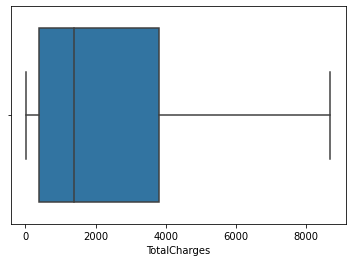

In [ ]:
for col in num_cols:
    if check_outlier(df, col):
        print("##########################################")
        print("Outlier tresholds for ", col, " is ", outlier_thresholds(df, col))
        print("There is at least one outlier data in",col, "\n")

    else:
        print("##########################################")
        print("Outlier tresholds for ", col, " is ", outlier_thresholds(df, col))
        print("There is no outlier data in",col,"\n")    
    sns.boxplot(x=df[col])
    plt.show(block=True)

## Missing Values

In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [ ]:
na_cols = missing_values_table(df, True)

              n_miss  ratio
TotalCharges      11  0.160


In [ ]:
# Observations that TotalCharges is NaN
df[df["TotalCharges"].isna()].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:
# Observations that TotalCharges is NaN
df[df["tenure"]==0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

There are only 11 missing values for the TotalCharges column. Actually, this values are exclusive for customers with zero tenure. Due to the fact that the customer never paid the business anything, it is possible to deduce that they are missing. This missing values will be substituted with zero.

In [ ]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)

In [ ]:
missing_values_table(df, True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

## Feature Extraction

In [ ]:
# annual categorical variable from tenure variable
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_tenure_year"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_tenure_year"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_tenure_year"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_tenure_year"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_tenure_year"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_tenure_year"] = "5-6 Year"

In [ ]:
# mark as engaged any contract customers for 1 or 2 years.
df["NEW_engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)


In [ ]:
# total number of services received by the customer
df['NEW_total_services'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)


In [ ]:
# customers who subscribe to streaming services
df["NEW_FLAG_streaming"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)


In [ ]:
# Customers with longer tenures than a year and lower total charges on average
df["NEW_not_risky"] = df.apply(lambda x : 1 if (x["NEW_engaged"] == 1) & (x["TotalCharges"] < df["TotalCharges"].mean()) else 0,  axis = 1)

In [ ]:
# Customers with shorter tenures than a year and higher total charges on average
df["NEW_risky"] = df.apply(lambda x : 1 if (x["NEW_engaged"] == 0) & (x["TotalCharges"] > df["TotalCharges"].mean()) else 0,  axis = 1)

In [ ]:
# Customers with shorter tenures than a year and higher total charges on average
df["NEW_check_and_senior"] = df.apply(lambda x : 1 if (x["PaymentMethod"] == "Electronic check") or (x["PaymentMethod"] == "Mailed check") & x["SeniorCitizen"]== 1 else 0,  axis = 1)

In [ ]:
# Customers with shorter tenures than a year and higher total charges on average
df["NEW_tenure_higher_charges"] = df.apply(lambda x : 1 if (x["NEW_engaged"] == 0) & (x["MonthlyCharges"] > df["MonthlyCharges"].mean()) else 0,  axis = 1)

In [ ]:
# People who do not receive any support, backup or protection
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)


In [ ]:
# Young customers with monthly contracts
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)


In [ ]:
# flag autopayment
df["NEW_FLAG_autopayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)


In [ ]:
# avg payment monthly
df["NEW_avg_charges"] = df["TotalCharges"] / (df["tenure"] + 1)


In [ ]:
# price increase relative to avg price
df["NEW_increase"] = df["NEW_avg_charges"] / df["MonthlyCharges"]


## Encoding

In [ ]:
# label encoding
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [ ]:
binary_cols = [col for col in df.columns if (df[col].dtype not in ["int64", "float64"]) and (df[col].nunique() == 2)]
binary_cols

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [ ]:
for col in binary_cols:
    df = label_encoder(df, col)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_tenure_year,NEW_engaged,NEW_total_services,NEW_FLAG_streaming,NEW_not_risky,NEW_risky,NEW_check_and_senior,NEW_tenure_higher_charges,NEW_noProt,NEW_Young_Not_Engaged,NEW_FLAG_autopayment,NEW_avg_charges,NEW_increase
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,0-1 Year,0,1,0,0,0,1,0,1,1,0,14.925,0.500
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,2-3 Year,1,3,0,1,0,0,0,1,0,0,53.986,0.948
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,0-1 Year,0,3,0,0,0,0,0,1,1,0,36.050,0.669
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,3,0,1,0,0,0,1,0,1,40.016,0.946
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,0-1 Year,0,1,0,0,0,1,1,1,1,0,50.550,0.715


In [ ]:
# one-hot encoding
def one_hot_encoder(dataframe, ohe_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=ohe_cols, drop_first=drop_first)
    return dataframe

In [ ]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
ohe_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'NEW_tenure_year',
 'NEW_total_services']

In [ ]:
df = one_hot_encoder(df, ohe_cols, drop_first=True)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_engaged,NEW_FLAG_streaming,NEW_not_risky,NEW_risky,NEW_check_and_senior,NEW_tenure_higher_charges,NEW_noProt,NEW_Young_Not_Engaged,NEW_FLAG_autopayment,NEW_avg_charges,NEW_increase,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_tenure_year_1-2 Year,NEW_tenure_year_2-3 Year,NEW_tenure_year_3-4 Year,NEW_tenure_year_4-5 Year,NEW_tenure_year_5-6 Year,NEW_total_services_1,NEW_total_services_2,NEW_total_services_3,NEW_total_services_4,NEW_total_services_5,NEW_total_services_6,NEW_total_services_7
0,7590-VHVEG,0,0,1,0,1,0,1,29.850,29.850,0,0,0,0,0,1,0,1,1,0,14.925,0.500,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.950,1889.500,0,1,0,1,0,0,0,1,0,0,53.986,0.948,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.850,108.150,1,0,0,0,0,0,0,1,1,0,36.050,0.669,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.300,1840.750,0,1,0,1,0,0,0,1,0,1,40.016,0.946,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.700,151.650,1,0,0,0,0,1,1,1,1,0,50.550,0.715,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# rare encoding

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [ ]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [ ]:
df = rare_encoder(df, 0.01)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_engaged,NEW_FLAG_streaming,NEW_not_risky,NEW_risky,NEW_check_and_senior,NEW_tenure_higher_charges,NEW_noProt,NEW_Young_Not_Engaged,NEW_FLAG_autopayment,NEW_avg_charges,NEW_increase,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_tenure_year_1-2 Year,NEW_tenure_year_2-3 Year,NEW_tenure_year_3-4 Year,NEW_tenure_year_4-5 Year,NEW_tenure_year_5-6 Year,NEW_total_services_1,NEW_total_services_2,NEW_total_services_3,NEW_total_services_4,NEW_total_services_5,NEW_total_services_6,NEW_total_services_7
0,Rare,0,0,1,0,1,0,1,29.850,29.850,0,0,0,0,0,1,0,1,1,0,14.925,0.500,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Rare,1,0,0,0,34,1,0,56.950,1889.500,0,1,0,1,0,0,0,1,0,0,53.986,0.948,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,Rare,1,0,0,0,2,1,1,53.850,108.150,1,0,0,0,0,0,0,1,1,0,36.050,0.669,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,Rare,1,0,0,0,45,0,0,42.300,1840.750,0,1,0,1,0,0,0,1,0,1,40.016,0.946,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,Rare,0,0,0,0,2,1,1,70.700,151.650,1,0,0,0,0,1,1,1,1,0,50.550,0.715,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
df = df.drop(["customerID"], axis=1)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_engaged,NEW_FLAG_streaming,NEW_not_risky,NEW_risky,NEW_check_and_senior,NEW_tenure_higher_charges,NEW_noProt,NEW_Young_Not_Engaged,NEW_FLAG_autopayment,NEW_avg_charges,NEW_increase,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_tenure_year_1-2 Year,NEW_tenure_year_2-3 Year,NEW_tenure_year_3-4 Year,NEW_tenure_year_4-5 Year,NEW_tenure_year_5-6 Year,NEW_total_services_1,NEW_total_services_2,NEW_total_services_3,NEW_total_services_4,NEW_total_services_5,NEW_total_services_6,NEW_total_services_7
0,0,0,1,0,1,0,1,29.850,29.850,0,0,0,0,0,1,0,1,1,0,14.925,0.500,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,34,1,0,56.950,1889.500,0,1,0,1,0,0,0,1,0,0,53.986,0.948,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,2,1,1,53.850,108.150,1,0,0,0,0,0,0,1,1,0,36.050,0.669,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,45,0,0,42.300,1840.750,0,1,0,1,0,0,0,1,0,1,40.016,0.946,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.700,151.650,1,0,0,0,0,1,1,1,1,0,50.550,0.715,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


## Feature Scaling

In [ ]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277,-1.160,-0.993
1,0.066,-0.260,-0.172
2,-1.237,-0.363,-0.958
3,0.514,-0.747,-0.194
4,-1.237,0.197,-0.939


# Model

In [ ]:
y = df["Churn"]
X = df.drop(["Churn"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7818267865593942

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

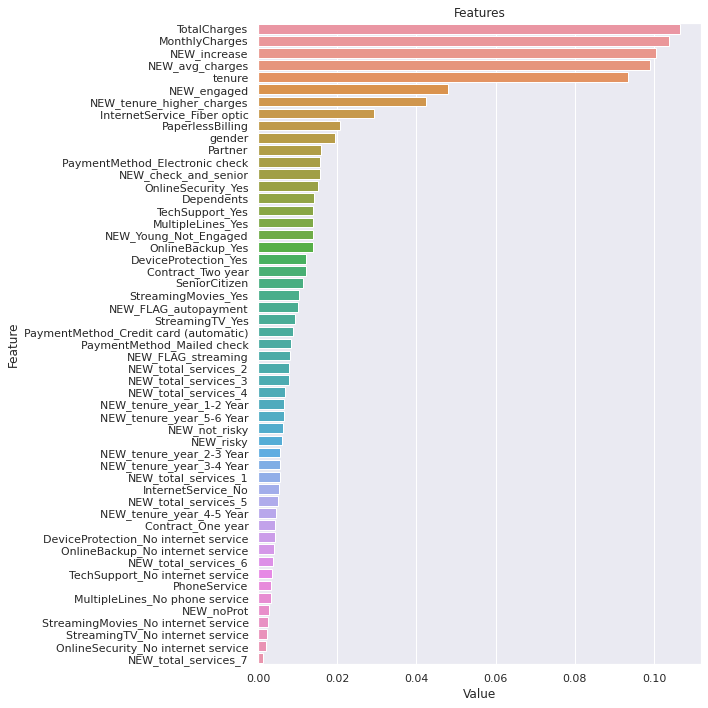

In [ ]:
plot_importance(rf_model, X_train )